In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('chest_xray'))

print(len(os.listdir('chest_xray/NORMAL')))
print(len(os.listdir('chest_xray/PNEUMONIA')))

['NORMAL', 'PNEUMONIA']
1583
4273


In [3]:
base_dir = 'chest_xray'

## Data Preprocessing

(1426, 1734)


<function matplotlib.pyplot.show(close=None, block=None)>

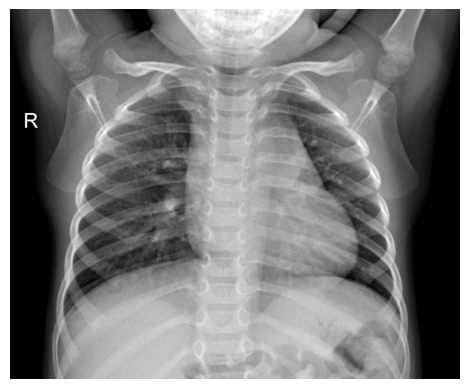

In [4]:
image_path= 'chest_xray/NORMAL/NORMAL-1070073-0001.jpeg'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#displaying the image
plt.imshow(img, cmap='gray')
plt.axis('off') ## turn off the axis numbers
plt.show

In [5]:
img_size = 224
batch_size = 32

# Train Test Split

In [6]:
#Image data generator
data_gen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2 #use 20% data for validation
)

In [7]:
#Image Data Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 4686 images belonging to 2 classes.


In [8]:
#Validation Generator
validation_generator =  data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 1170 images belonging to 2 classes.


# Model Architecture

In [9]:
num_classes = 2

In [10]:
#Model defination
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

## Training

In [14]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
##training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size, ##number of steps per epoch
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size
)

Epoch 1/15
146/146 [==============================] - 188s 1s/step - loss: 0.4308 - accuracy: 0.8309 - val_loss: 0.1887 - val_accuracy: 0.9366
Epoch 2/15
146/146 [==============================] - 178s 1s/step - loss: 0.1975 - accuracy: 0.9336 - val_loss: 0.1409 - val_accuracy: 0.9505
Epoch 3/15
146/146 [==============================] - 180s 1s/step - loss: 0.1554 - accuracy: 0.9456 - val_loss: 0.1618 - val_accuracy: 0.9462
Epoch 4/15
146/146 [==============================] - 185s 1s/step - loss: 0.1349 - accuracy: 0.9521 - val_loss: 0.1265 - val_accuracy: 0.9575
Epoch 5/15
146/146 [==============================] - 185s 1s/step - loss: 0.1202 - accuracy: 0.9566 - val_loss: 0.1180 - val_accuracy: 0.9566
Epoch 6/15
146/146 [==============================] - 180s 1s/step - loss: 0.0998 - accuracy: 0.9665 - val_loss: 0.1428 - val_accuracy: 0.9566
Epoch 7/15
146/146 [==============================] - 179s 1s/step - loss: 0.0918 - accuracy: 0.9680 - val_loss: 0.1452 - val_accuracy: 0.9601

## Evaluation

In [16]:
  #Model Evalution
print("Evaluating Model...")
val_loss, val_accuracy = model.evaluate(validation_generator,steps = validation_generator.samples //batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating Model...
36/36 [==============================] - 27s 758ms/step - loss: 0.1510 - accuracy: 0.9601
Validation Accuracy: 96.01%


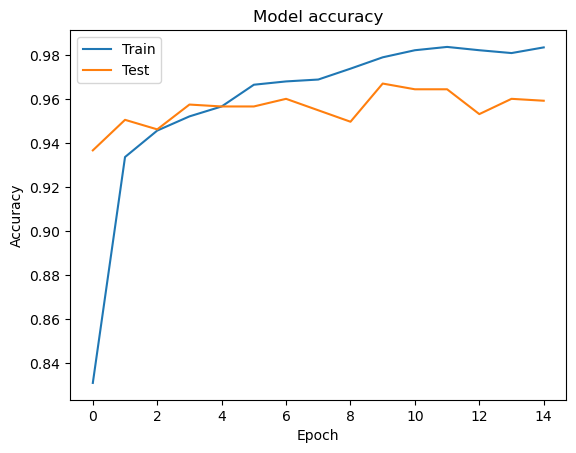

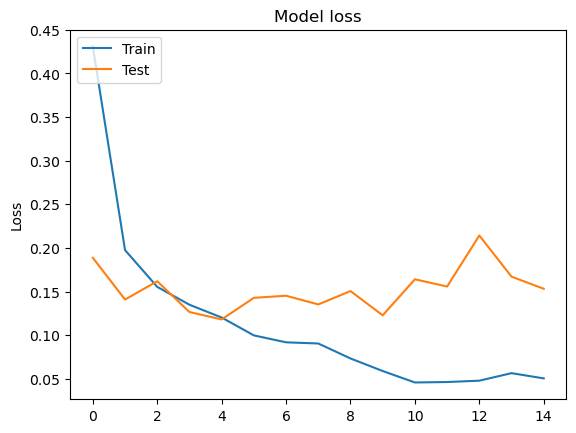

In [17]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#PLot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [19]:
model.save('xray_model.h5')

In [20]:
from PIL import Image

In [21]:
#Function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to a numpy array
  img_array = np.array(img)
  #add batch dimension
  img_array = np.expand_dims(img_array,axis=0)
  #Scale the image values to [0,1]
  img_array = img_array.astype('float32')/255.
  return img_array

#Function to predict the class of an image
def predict_image_class(model,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [22]:
#create a mapping from class indices to class name
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [23]:
class_indices

{0: 'NORMAL', 1: 'PNEUMONIA'}

## Model Explanantion (XAI)

In [26]:
from lime import lime_image

In [28]:
x = 10
num_batches_to_skip = x // batch_size
for i in range(num_batches_to_skip):
    _ = next(validation_generator)

# Get the batch containing the desired image
X_val_batch, _ = next(validation_generator)

explanation = explainer.explain_instance(
    X_val_batch[x % batch_size],
    model.predict,
    top_labels=2
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 139ms/step


In [33]:
image, mask = explanation.get_image_and_mask(0, hide_rest=True, num_features=10)

In [36]:
original_image = X_val_batch[x % batch_size]

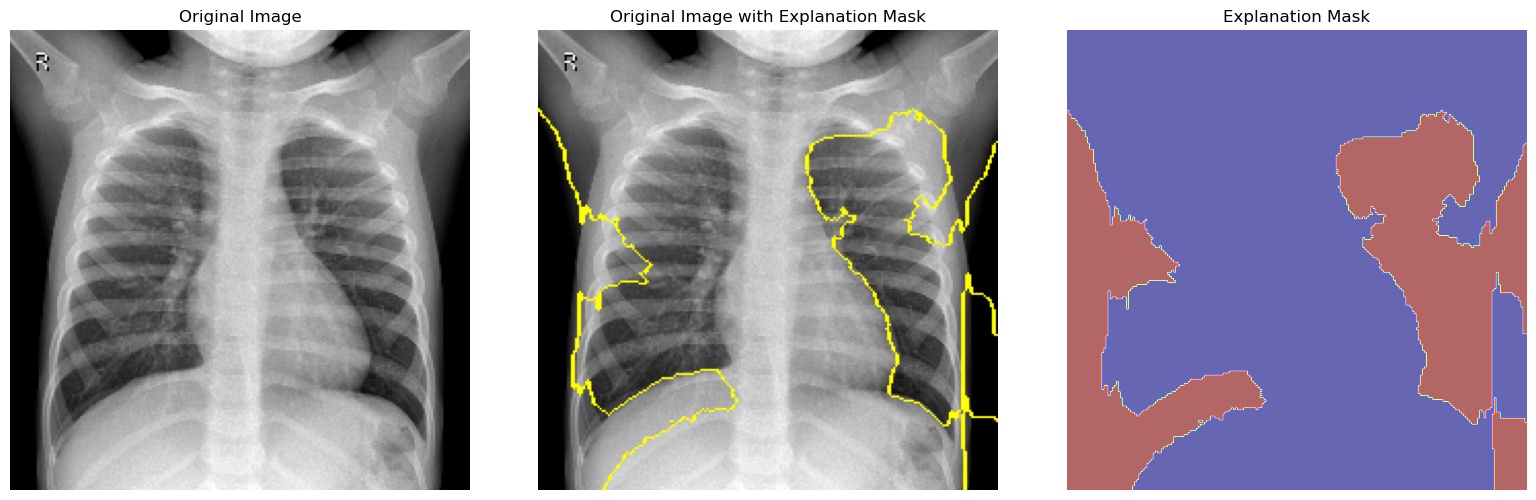

In [38]:
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(16, 5))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Plot the original image with LIME explanation mask overlaid
plt.subplot(1, 3, 2)
plt.imshow(mark_boundaries(original_image, mask))
plt.title('Original Image with Explanation Mask')
plt.axis('off')

# Plot the LIME explanation mask
plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='jet', alpha=0.6)  # Using jet colormap for better visibility
plt.title('Explanation Mask')
plt.axis('off')

plt.tight_layout()
plt.show()